# Flight Fare Prediction (Training Data)

## Life Cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data Preprocessing
- Model Training
- Choose Best Model

## 1) Problem Statement

- Travelling through flights has become an integral part of today’s lifestyle as more and more people are opting for faster travelling options. The flight ticket prices increase or decrease every now and then depending on various factors like timing of the flights, destination, and duration of flights various occasions such as vacations or festive season. Therefore, having some basic idea of the flight fares before planning the trip will surely help many people save money and time. The main goal is to predict the fares of the flights based on different factors available in the provided dataset.


## 2) Data Collection

- Dataset source: https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh?resource=download
- This dataset contains 10683 rows and 11 columns.

### 2.1 Importing Required Libraries and CSV file

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read CSV File
df = pd.read_excel('Data_Train.xlsx')

In [3]:
# First 5 rows
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Last 5 rows
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### 2.2 Dataset Information

#### Shape of Dataset

In [5]:
df.shape

(10683, 11)

There are 10683 rows and 11 columns in the dataset

#### Attributes

In [8]:
for column in df.columns:
    print(column)

Airline
Date_of_Journey
Source
Destination
Route
Dep_Time
Arrival_Time
Duration
Total_Stops
Additional_Info
Price


There are 10 independent features and 1 dependent feature.

#### Information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### Check Missing Values

In [10]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

_*There are one missing value in Route and one in Total Stops.*_

#### Check Duplicates

In [11]:
df.duplicated().sum()

220

_*There are 220 dupicates in the dataset.*_

#### Check Data Types

In [12]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### Check the number of unique values of each column in the dataset

In [13]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

#### Check Statistics of The dataset

In [15]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### Check various categories present in the different categorical column

In [16]:
df['Airline'].dtypes

dtype('O')

In [20]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [25]:
print(f"There are {len(cat_features)} categorical feature(s) : \n{cat_features}")
print(f"There are {len(num_features)} numerical feature(s) : {num_features}")

There are 10 categorical feature(s) : 
['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']
There are 1 numerical feature(s) : ['Price']


### Time Series Data Analysis

In [26]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [58]:
# Function to convert object datatype to datetime 
def convert_to_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [59]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    convert_to_datetime(i)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specif

In [60]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Extracting Day, Month and Year and store in another columns

In [66]:
df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year
# df['Arrival_Time'].dt.minute

Deleting Date_of_Journey column as there is no need of this column.

In [70]:
df.drop('Date_of_Journey', axis=1, inplace=True)

Extracting Hour and Minute from Arrival_Time column

In [67]:
df['Arr_Hour'] = df['Arrival_Time'].dt.hour
df['Arr_Min'] = df['Arrival_Time'].dt.minute

Dropping the Arrival Time column

In [71]:
df.drop('Arrival_Time', axis=1, inplace=True)

Extracting Hour and Minute from Dep_Time column

In [68]:
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Min'] = df['Dep_Time'].dt.minute

Dropping the Arrival Time column

In [72]:
df.drop('Dep_Time', axis=1, inplace=True)

In [73]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50


In [103]:
df['Duration_Hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_Min'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]



In [104]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,duration,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2h 50m,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50,7h 25m,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,4,25,9,25,19h0m 0m,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,23,30,18,5,5h 25m,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,21,35,16,50,4h 45m,4,45


In [111]:
df.drop(columns={'Duration','duration'}, inplace=True)

In [106]:
df['Duration_Min'] = df['Duration_Min'].fillna(0)

In [114]:
df[df['Duration_Hour']=='5m']
df.drop(6474, axis=0, inplace=True)

In [116]:
df['Duration_Hour'] = df['Duration_Hour'].astype('int64')
df['Duration_Min'] = df['Duration_Min'].astype('int64')

In [117]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Day                 int64
Month               int64
Year                int64
Arr_Hour            int64
Arr_Min             int64
Dep_Hour            int64
Dep_Min             int64
Duration_Hour       int64
Duration_Min        int64
dtype: object

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

- Nominal data --> data are not in any order --> OneHotEncoder is used in this case
- Ordinal data --> data are in order --> LabelEncoder is used in this case

In [119]:
# Now, We will find the categorical and continuous data from the dataframe
cat_df = [feature for feature in df.columns if df[feature].dtypes == 'O']
continuous_df = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [123]:
print(f"Total {len(cat_df)} categorical features are : {cat_df}")
print(f"Total {len(continuous_df)} continuous features are : {list(continuous_df)}")

Total 6 categorical features are : ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
Total 10 continuous features are : ['Price', 'Day', 'Month', 'Year', 'Arr_Hour', 'Arr_Min', 'Dep_Hour', 'Dep_Min', 'Duration_Hour', 'Duration_Min']


In [127]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Airline VS Price Analysis

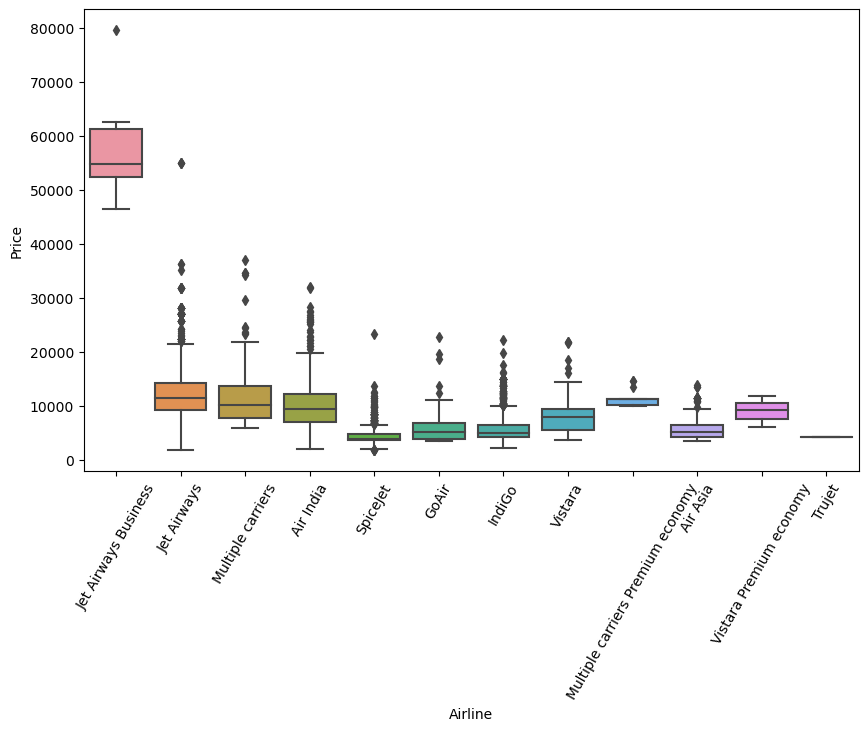

In [139]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Airline', y = 'Price', data = df.sort_values('Price', ascending=False))
plt.xticks(rotation=60)
plt.show()

From graph we can see that Jet Airways Business have the highest Price.

### Total Stops VS Price

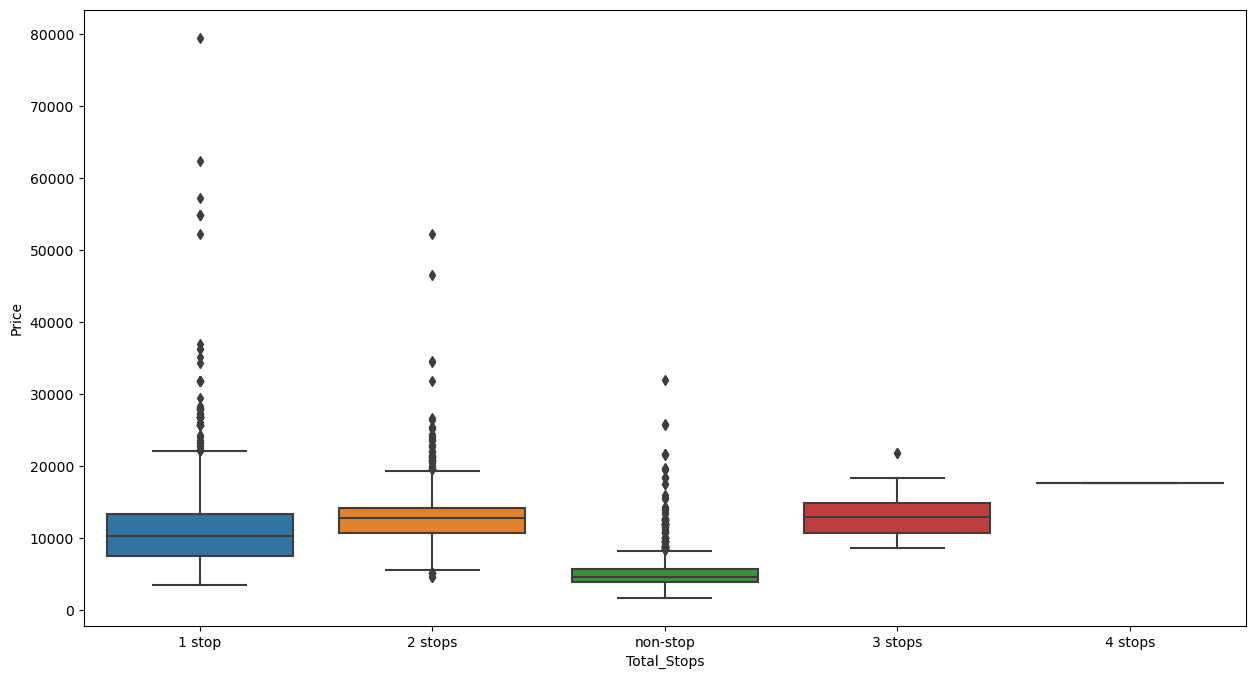

In [144]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops', y='Price' ,data=df.sort_values('Price', ascending=False))
plt.show()

#### Performing OneHotEncoding on Airline feature as It is Nominal Categorical Feature

In [146]:
Airline = pd.get_dummies(df['Airline'],drop_first=True)

In [148]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Source

In [149]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

### Source Vs Price

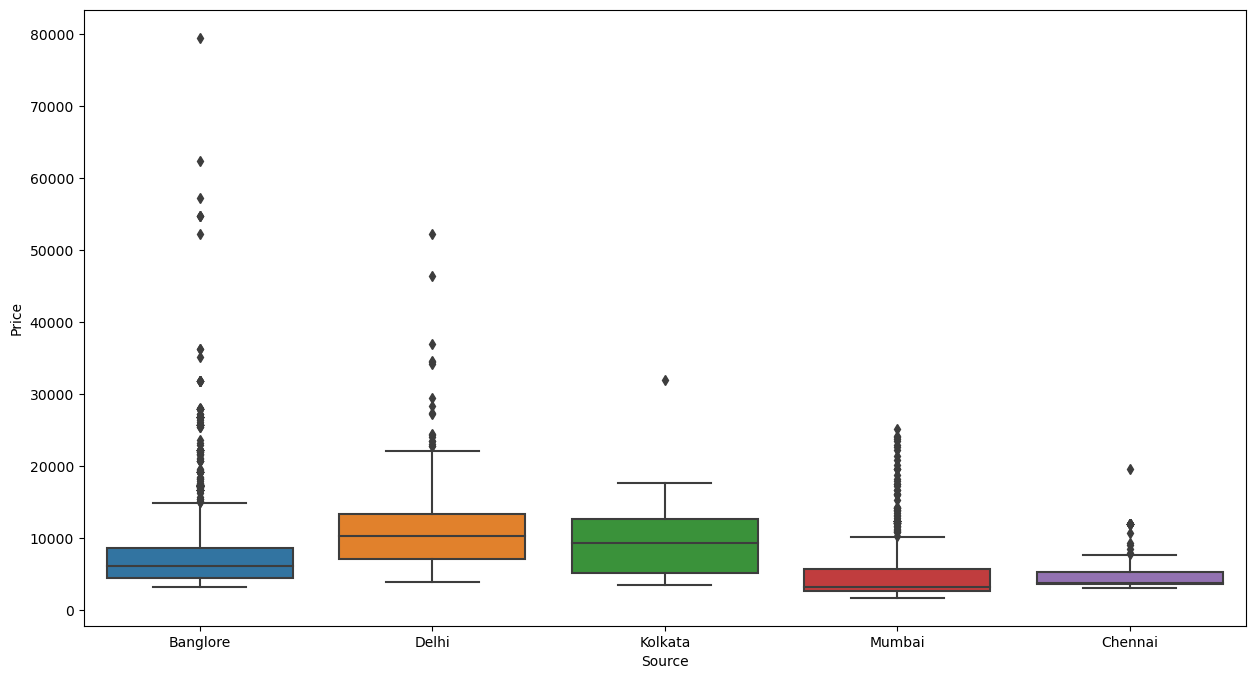

In [150]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Source', y='Price', data = df.sort_values('Price', ascending=False))
plt.show()

In [151]:
# Perform OneHotEncoding of Source column
Source = pd.get_dummies(df['Source'],drop_first=True)

In [152]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


#### Destination

In [153]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

#### Destination VS Price

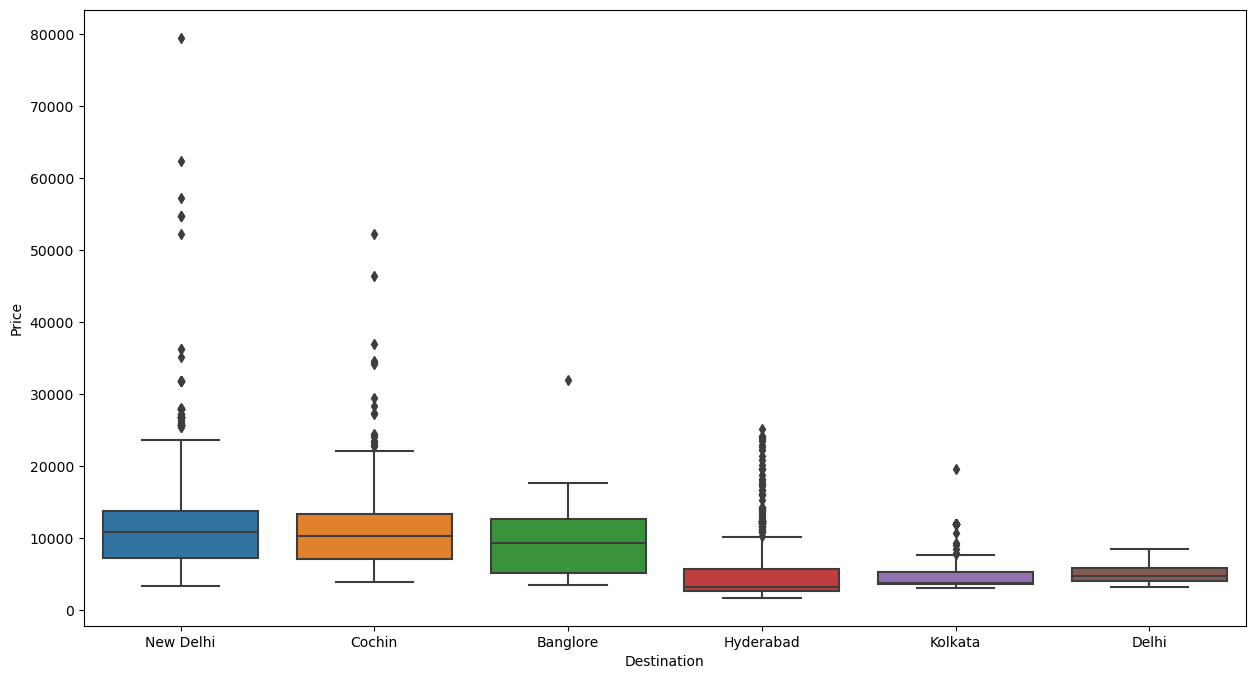

In [156]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination', y='Price', data = df.sort_values('Price', ascending=False))
plt.show()

In [158]:
# Encoding the Destination column
Destination = pd.get_dummies(df['Destination'], drop_first=True)

In [159]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [160]:
df.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [162]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(['Route', 'Additional_Info'],axis=1,inplace=True)

### Total Stops

In [163]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [168]:
dict = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df['Total_Stops'] = df['Total_Stops'].map(dict)

In [175]:
df['Total_Stops'] = df['Total_Stops'].astype('int64')
# df['Total_Stops'] = df['Total_Stops'].fillna(1)

In [176]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,2019,13,15,5,50,7,25


In [177]:
## Now Dropping the Source, Destination and Airline column from dataframe

df.drop(columns={'Airline','Source','Destination'},inplace=True)

In [178]:
df.head(2)

,Total_Stops,Price,Day,Month,Year,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,0,3897,24,3,2019,1,10,22,20,2,50
1,2,7662,5,1,2019,13,15,5,50,7,25


### After Preprocessing Now Concatenate all the dataframe in one DataFrame

In [179]:
final_df = pd.concat([df,Airline,Source,Destination],axis=1)

In [180]:
final_df

,Total_Stops,Price,Day,Month,Year,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,Duration_Hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,2019,13,15,5,50,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,2019,4,25,9,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,2019,23,30,18,5,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,2019,22,25,19,55,2,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,2019,23,20,20,45,2,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,2019,11,20,8,20,3,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,3,1,2019,14,10,11,30,2,...,0,0,0,0,0,0,0,0,0,1


In [181]:
final_df.shape

(10682, 31)

In [184]:
final_df['Year'].nunique()  #  ---> There is nothing but one unique value in year, so we will drop this Year column from df

final_df.drop('Year',axis=1, inplace=True)

In [186]:
final_df.head(2)

,Total_Stops,Price,Day,Month,Arr_Hour,Arr_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0


## Saving this final df into new CSV file so that we can use it in model training

In [187]:
final_df.to_csv('final_train_df.csv',index=False)